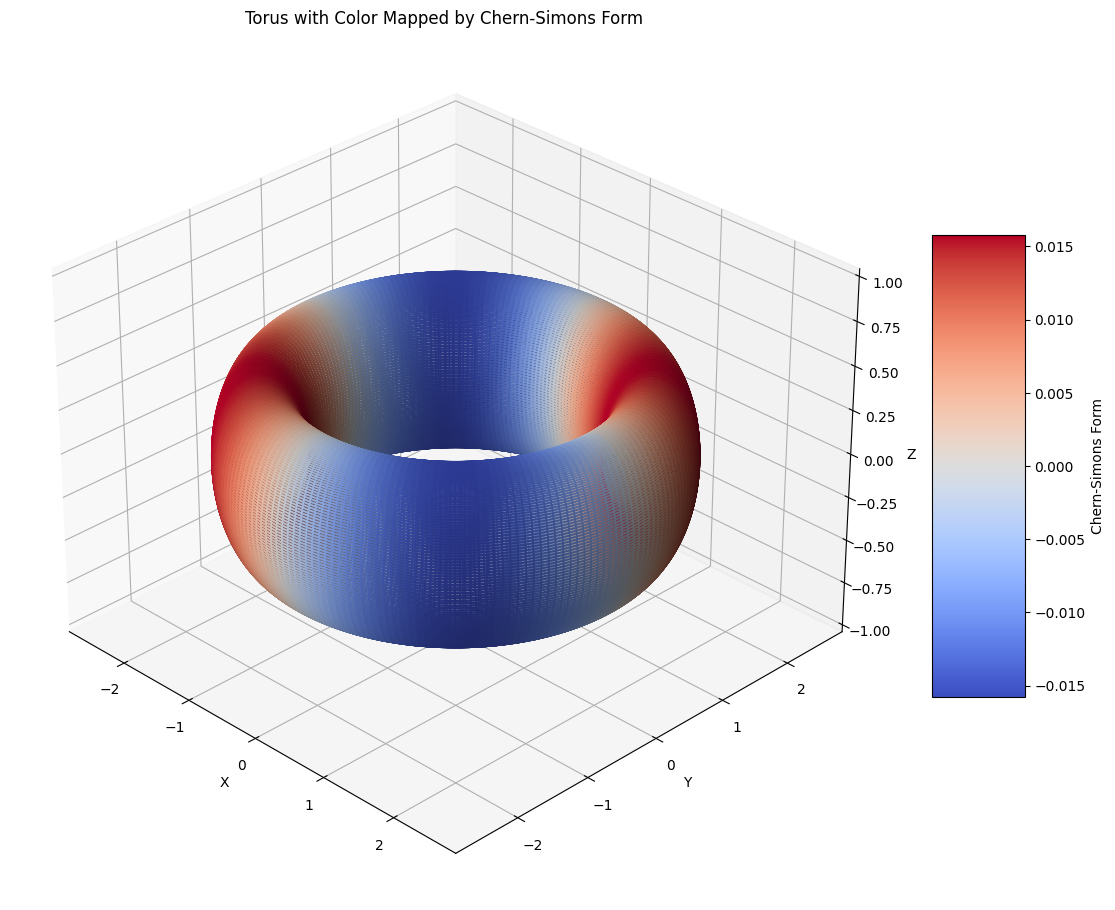

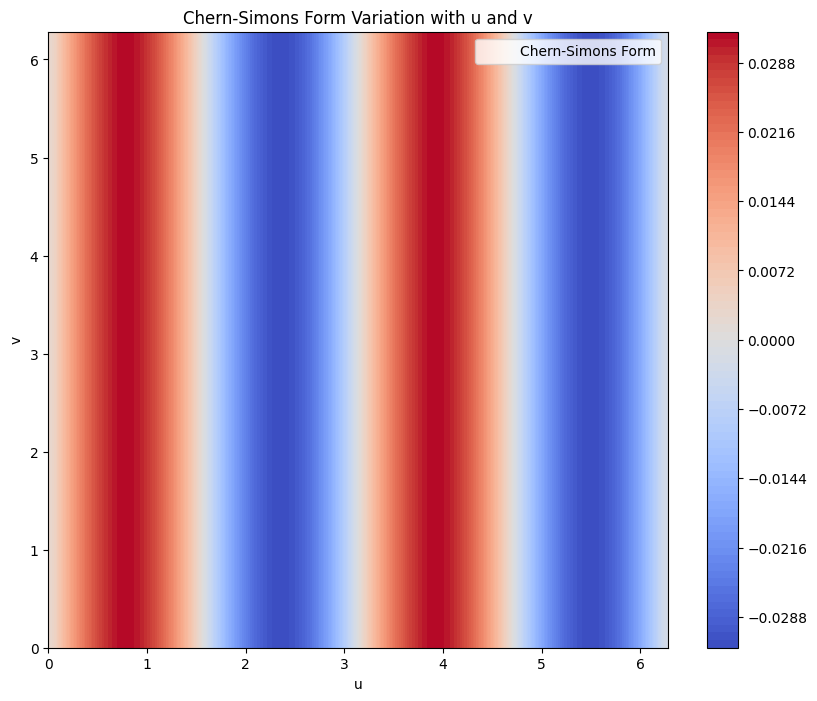

TypeError: torus() missing 2 required positional arguments: 'R' and 'r'

In [1]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata
import matplotlib.colors as mcolors

# 定义环面的参数方程
def torus(u, v, R, r):
    x = (R + r * np.cos(v)) * np.cos(u)
    y = (R + r * np.cos(v)) * np.sin(u)
    z = r * np.sin(v)
    return x, y, z

# 定义法线向量的计算函数
def normal_vector(u, v, R, r):
    nx = -np.cos(u) * np.cos(v)
    ny = -np.sin(u) * np.cos(v)
    nz = -np.sin(v)
    norm = np.sqrt(nx**2 + ny**2 + nz**2)
    return nx/norm, ny/norm, nz/norm

# 定义曲率的计算
def curvature(R, r, u, v):
    K = (r * R) / ((R + r * np.cos(v))**2)
    H = (R + 2 * r * np.cos(v)) / (2 * (R + r * np.cos(v)))
    return K, H

# 定义联络A的计算函数
def connection_A(theta, phi):
    # 定义v为流体速度的标量值，简化为1
    v = 1
    A_phi = v * np.cos(theta)
    return A_phi

# 计算Chern-Simons Form的值
def chern_simons_form(u_values, v_values, A_phi_values, dA_phi_u, dA_phi_v):
    CS_values = np.zeros_like(u_values)
    for i in range(u_values.shape[0]):
        for j in range(u_values.shape[1]):
            CS_values[i, j] = A_phi_values[i, j] * (dA_phi_u[i, j] - dA_phi_v[i, j])
    return CS_values

# 环面参数
R = 2  # 中心圆半径
r = 0.5  # 管道半径

# 采样点数量
sample_points = 200

# 均匀采样点
u_sample_fine = np.linspace(0, 2*np.pi, sample_points)
v_sample_fine = np.linspace(0, 2*np.pi, sample_points)
u_sample_fine, v_sample_fine = np.meshgrid(u_sample_fine, v_sample_fine)

# 计算联络A在每个采样点上的值
A_phi_values = connection_A(u_sample_fine, v_sample_fine)

# 计算联络A的梯度
dA_phi_u, dA_phi_v = np.gradient(A_phi_values)

# 计算Chern-Simons Form的值
CS_values = chern_simons_form(u_sample_fine, v_sample_fine, A_phi_values, dA_phi_u, dA_phi_v)

# 采样点的位置
x_sample_fine, y_sample_fine, z_sample_fine = torus(u_sample_fine, v_sample_fine, R, r)

# 将Chern-Simons Form的值映射到颜色
norm_CS = mcolors.Normalize(vmin=np.min(CS_values), vmax=np.max(CS_values))
colormap_CS = cm.ScalarMappable(norm=norm_CS, cmap='coolwarm')

# 绘制环面并根据Chern-Simons Form的值改变颜色
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_sample_fine, y_sample_fine, z_sample_fine, facecolors=colormap_CS.to_rgba(CS_values), rstride=1, cstride=1, alpha=0.5)

# 添加颜色条作为图例
colormap_CS.set_array([])
fig.colorbar(colormap_CS, ax=ax, shrink=0.5, aspect=5, label='Chern-Simons Form')

# 设置视角
ax.view_init(elev=30, azim=-45)

# 设置标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Torus with Color Mapped by Chern-Simons Form')
ax.set_zlim(-1, 1)

plt.show()

# 采样点数量
sample_points = 100
u_sample, v_sample = np.meshgrid(np.linspace(0, 2*np.pi, sample_points), np.linspace(0, 2*np.pi, sample_points))

# 计算联络A在每个采样点上的值
A_phi_values = connection_A(u_sample, v_sample)

# 计算梯度
dA_phi_u, dA_phi_v = np.gradient(A_phi_values)

# 计算Chern-Simons Form的值
CS_values = chern_simons_form(u_sample, v_sample, A_phi_values, dA_phi_u, dA_phi_v)

# 可视化
plt.figure(figsize=(10, 8))
CS_contour = plt.contourf(u_sample, v_sample, CS_values, levels=100, cmap='coolwarm')
plt.colorbar(CS_contour)
plt.xlabel('u')
plt.ylabel('v')
plt.title('Chern-Simons Form Variation with u and v')
plt.legend(['Chern-Simons Form'])
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义联络A的向量表示函数
def connection_vector(u, v, A_phi):
    dx = -np.sin(u) * A_phi
    dy = np.cos(u) * A_phi
    dz = 0  # 在环面上，A_phi仅在u, v平面内变化
    return dx, dy, dz

# 采样点
sample_points = 16
u_sample, v_sample = np.meshgrid(np.linspace(0, 2*np.pi, sample_points), np.linspace(0, 2*np.pi, sample_points))
A_phi_values = connection_A(u_sample, v_sample)

# 计算向量
connection_vectors = np.array([connection_vector(u, v, A_phi) for u, v, A_phi in zip(u_sample.flatten(), v_sample.flatten(), A_phi_values.flatten())])

# 环面位置
x_sample, y_sample, z_sample = torus(u_sample.flatten(), v_sample.flatten())

# 可视化
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-1, 1)
ax.quiver(x_sample, y_sample, z_sample, connection_vectors[:,0], connection_vectors[:,1], connection_vectors[:,2], length=0.4, normalize=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Connection A Variation in 3D Space')
plt.show()